In [1]:
%load_ext autoreload
%autoreload 2

import builtins
import IPython.lib.deepreload

builtins.reload = IPython.lib.deepreload.reload  # type: ignore

In [2]:
import math
from functools import reduce
from operator import add
import matplotlib.pyplot as plt

import swcgeom
from swcgeom.analysis import draw
from swcgeom.transforms import TreeNormalizer, TreeSmoother

In [3]:
swc1 = "data/101711-10_4p5-of-16_initial.CNG.swc"
swc2 = "data/101711-11_16-of-16_initial.CNG.swc"
swc3 = "data/1059283677_15257_2226-X16029-Y23953.swc"

# create a tree
tree1 = swcgeom.Tree.from_swc(swc1)
tree2 = swcgeom.Tree.from_swc(swc2)
tree3 = swcgeom.Tree.from_swc(
    swc3, extra_cols=["seg_id", "level", "mode", "timestamp", "TFresindex"]
)

In [4]:
# generate swc file
# tree.to_swc("./test.swc")

In [5]:
# print tree
print("print tree:", tree1)
print("print node:", tree1[1])
for a in tree1[:3]:
    print(a)

segments = tree1.get_segments()
eq = len(segments) == tree1.number_of_edges()
print(f"Neuron tree with {len(segments)} segments,", eq)

branches = tree1.get_branches()
print(f"Neuron tree with {len(branches)} branches.")

# collect tips
tips = tree1.traverse(leave=lambda cur, children: max(1, reduce(add, children, 0)))
print(f"tips: {tips}")

print tree: Neuron Tree with 161 nodes and 160 edges
print node: 1 1 7.7200 -20.9800 0.0000 22.3570 0
0 1 0.0000 0.0000 0.0000 22.3570 -1
1 1 7.7200 -20.9800 0.0000 22.3570 0
2 1 -7.7100 20.9700 0.0000 22.3570 0
Neuron tree with 160 segments, True
Neuron tree with 35 branches.
tips: 21


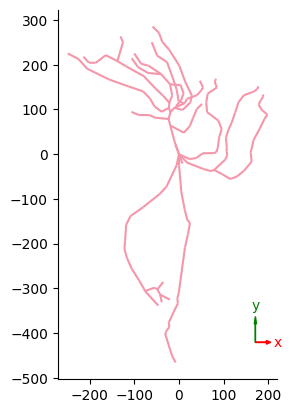

In [6]:
_ = draw(tree1)

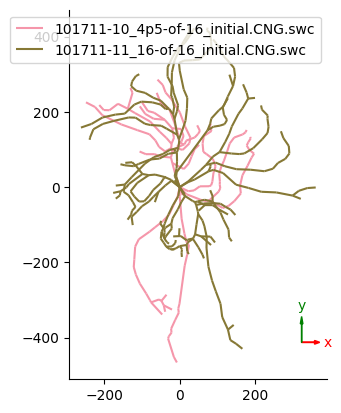

In [7]:
fig, ax = plt.subplots(1, 1)
_ = draw(tree1, ax=ax)
_ = draw(tree2, ax=ax)

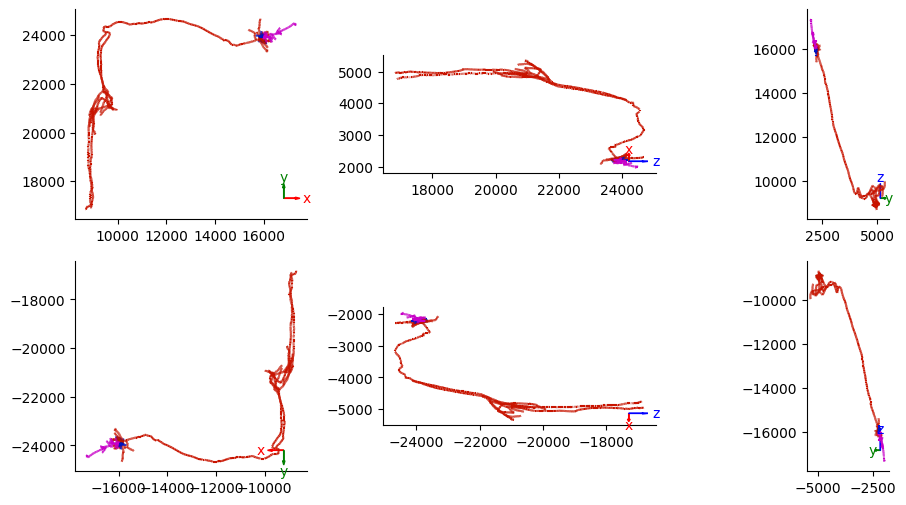

In [8]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 6)
ax = axes.flatten()
for i, project in enumerate(["xy", "yz", "zx", "yx", "zy", "xz"]):
    _ = draw(tree3, color="vaa3d", camera=project, ax=ax[i])

(<Figure size 640x480 with 2 Axes>, <Axes: >)

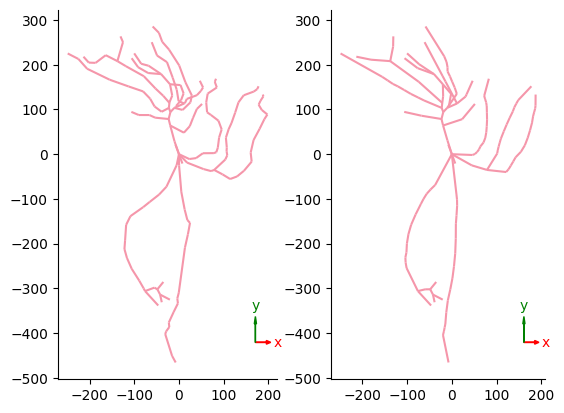

In [10]:
fig, axes = plt.subplots(1, 2)
draw(tree1, ax=axes[0])
draw(TreeSmoother(n_nodes=10)(tree1), ax=axes[1])

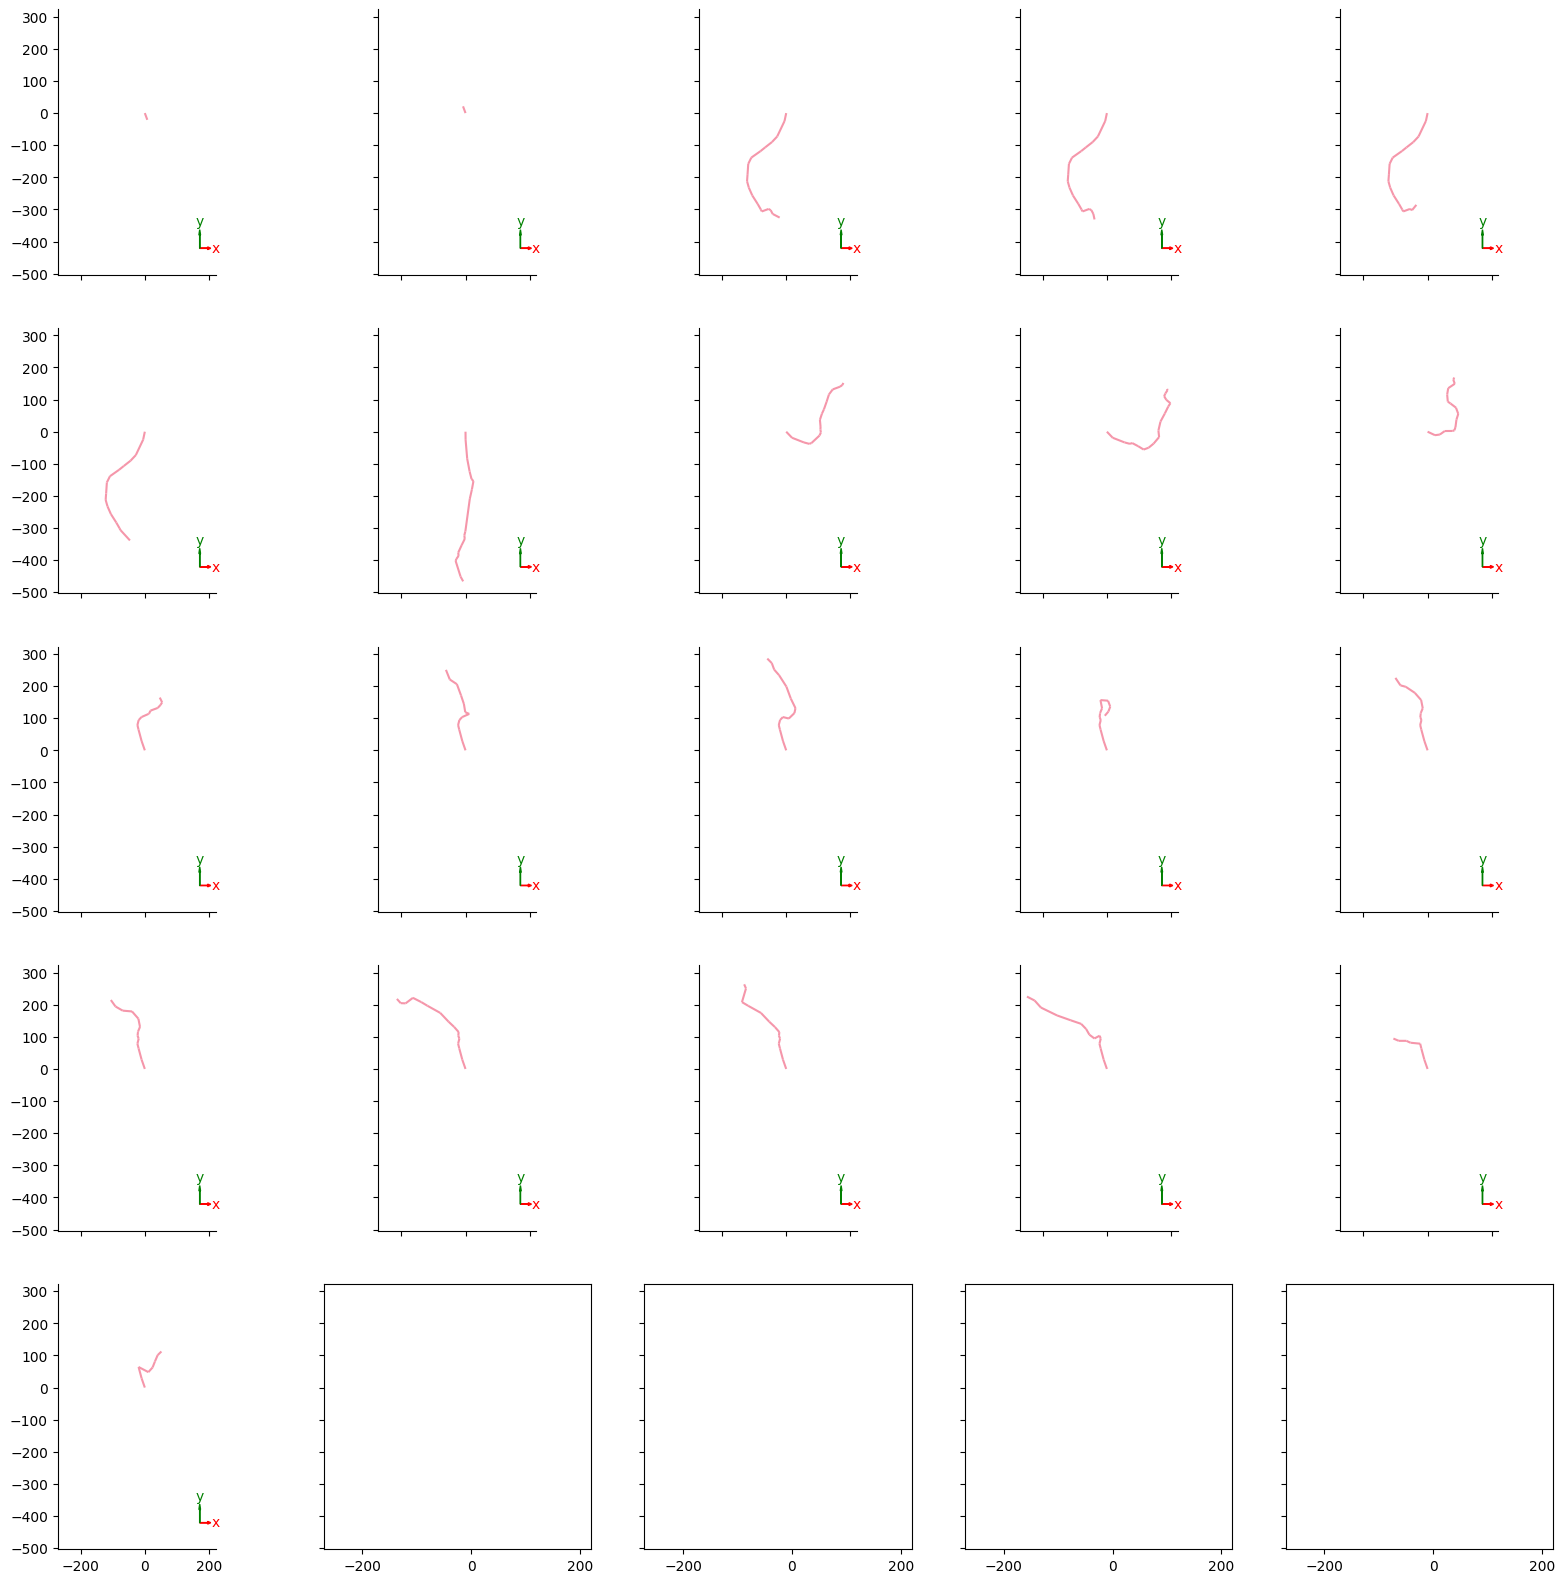

In [ ]:
paths = tree1.get_paths()
fig, axes = plt.subplots(math.ceil(len(paths) / 5), 5, sharex=True, sharey=True)
fig.set_size_inches(20, 20)
axes = axes.flatten()
for i in range(len(paths)):
    draw(paths[i], ax=axes[i])